<a href="https://colab.research.google.com/github/AgustinBiasca/Linear-Regression/blob/main/Boston_Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Vamos a trabajar con los hogares en Boston usando la regresion lineal.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Boston.csv')

In [ ]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
df.tail()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


<Axes: xlabel='medv', ylabel='lstat'>

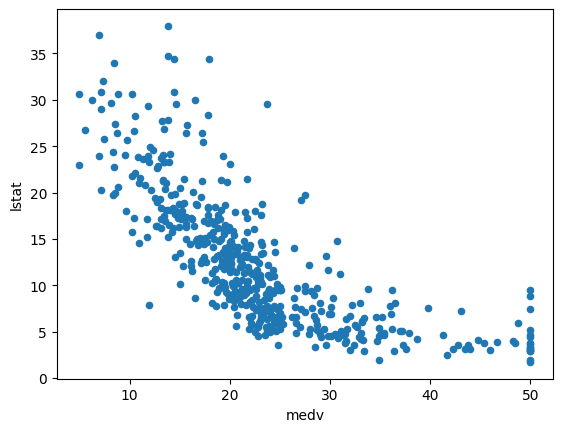

In [ ]:
df.plot(x='medv', y ='lstat', kind= 'scatter')

Vemos que mientras mas bajo es el estatus inferior de la poblacion. Mas alto es el precio medio de la vivienda

#MODELO DE REGRESION LINEAL

y(medv) = Bo + B1. lstat

In [ ]:
#Nuestra x es:
X = df['lstat']
X.head()

,lstat
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


In [ ]:
#Nuestra y (variable dependiente)
y = df['medv']

y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0000)

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [ ]:
#Vamos a convertir nuestra variable x en un array de numpy para asi sumarle una dimension.
X_train = np.array(X_train)[:, np.newaxis]
X_test = np.array(X_test)[:, np.newaxis]

#Estos es solo necesario hacerlo en un modelo simple (Una sola variable independiente).

In [ ]:
print(X_train.shape) #Sumamos columna
print(X_test.shape)  #Sumamos columna
print(y_train.shape)
print(y_test.shape)

(354, 1)
(152, 1)
(354,)
(152,)


#Vamos a realizar la regresion lineal

In [ ]:
from sklearn.linear_model import  LinearRegression

lr = LinearRegression()

#Vamos a entrenar a el modelo.

lr.fit(X_train, y_train)

LinearRegression()

Vamos a calcular los coeficientes/parametros para asi poder predecir

In [ ]:
print(lr.intercept_)  #El intercepto
print(lr.coef_)  #La pendiente


34.789780590604124
[-0.96814078]


Intercepto = 34.78978.... Significa que si no hay poblacion de bajos recursos, el valor medio de la vivienda es igual a 34.79 mil dolare.

coeficiente = -0.9681...  Significa que por cada punto porcentual de poblacion de bajos ingresos el valor medio de las viviendas, DISMINUYE EN APROXIMADAMENTE 0.97 miles de dolares

In [ ]:
#Ahora vamos a realizar la prediccion de nuesto modelo.
y_pred = lr.predict(X_test)  #le decimos que no prediga las pruebas de la variable independeinete

Una vez predicho vamos a ver que tan confiable es. Con el r2 y RMSE

#Calculo de valores RMSE y R^2

RMSE es la desviacion estandar de los errores que se producen al realizar una prediccion en un conjunto de datos. Es similar al MSE (Error cuadratico medio), pero se considera la raiz del valor al determinar la precision de la moda.

In [ ]:
y_test.shape  #Importante vamos a ver las filas para poder crear un indice

(152,)

Text(0, 0.5, 'Precio medio de las viviendas')

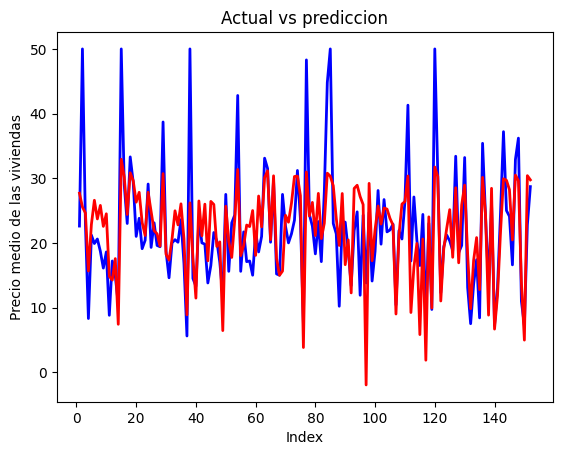

In [ ]:
#### ACTUAL VS PREDICCION

c = [i for i in range(1,153,1)] #Generamos el indice

fig= plt.figure()

plt.plot(c, y_test, color='blue',linewidth=2, linestyle='-') #Nuestro modelo actual.

plt.plot(c, y_pred, color='red', linewidth=2, linestyle='-') #Lo que predijo nuestro modelo

plt.title('Actual vs prediccion')
plt.xlabel('Index')
plt.ylabel('Precio medio de las viviendas')

Este grafico es bastante descriptivo. La linea Azul muestra lo que realmente paso(es el actual). Mientras que la roja es lo que nuestro modelo predijo que iba a pasar. Un modelo perfecto tendria que juntar ambas lineas. Pero la realidad siempre suele ser distinta. Ya que nuestro modelo de regresion lineal es bastante global.
La linea azul(actual) muestra datos reales, que pueden tener variabilidad, ruido o cambios bruscos. por ejemplo, una campaña de marketing con mucho gasto que no genero ventas.
Nuestro modelo no tiene en cuenta eso, NO replica cambios bruscos.

Vamos a analizar los residuos.

Text(0, 0.5, 'ytest - ypred')

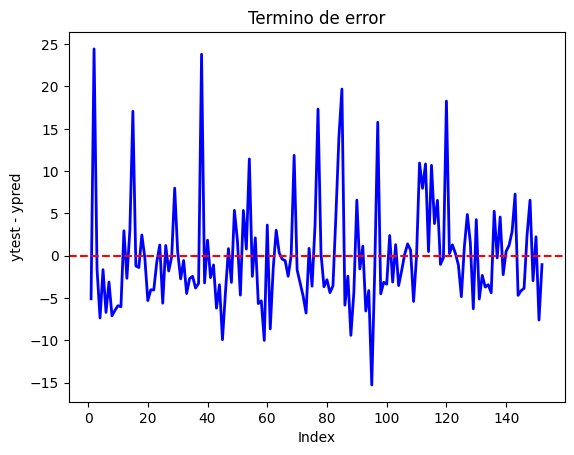

In [ ]:
#Residuo
c = [i for i in range(1,153,1)] #Indice

figure = plt.figure()

plt.plot(c, y_test - y_pred, color='blue', linewidth=2 , linestyle= '-')
plt.axhline(y=0 , color='red', linestyle= '--')
plt.title('Termino de error')
plt.xlabel('Index')
plt.ylabel('ytest - ypred')

Vemos la diferencia entre lo real y lo predicho.



*   Si el punto esta cerca de cero (0) El modelo acerto bien esa prediccion
*   Si esta muy por arriba de cero (0) el modelo subestimo (predijo menos ventas de las que hubo)
*   Si esta muy por debajo de 0 el modelo sobreestimo (Predijo mas ventas de las que hubo)



#R^2

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

r_cuadrado = r2_score(y_test, y_pred)


In [ ]:
print(f'El error cuadratico medio es: {mse}')
print(f'El r cuadrado es: {r_cuadrado}')

El error cuadratico medio es: 39.81715050474416
El r cuadrado es: 0.5218049526125568


Nuestro r cuadrado es decente. 0.5218049

nuestro error cuadratico es un poco mas importante: 39.8171505
si le aplicamos la raiz cuadrada tenemos cuantos miles de dolares es el error

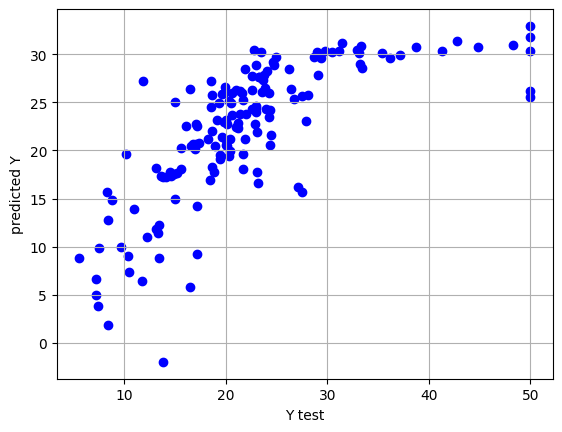

In [ ]:
plt.scatter(y_test, y_pred , c='blue')
plt.xlabel('Y test')
plt.ylabel('predicted Y')
plt.grid()